# Data Loading

In [74]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [76]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [77]:
df.shape

(5110, 12)

In [78]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [79]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [80]:
df.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [81]:
print(df['work_type'].unique().tolist())
print(df['Residence_type'].unique().tolist())
print(df['smoking_status'].unique().tolist())
print(df['gender'].unique().tolist())

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
['Urban', 'Rural']
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
['Male', 'Female', 'Other']


In [82]:
count = df['gender'].value_counts()
print(count)
countt = df['smoking_status'].value_counts()
print(countt)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


<Figure size 2000x1500 with 0 Axes>

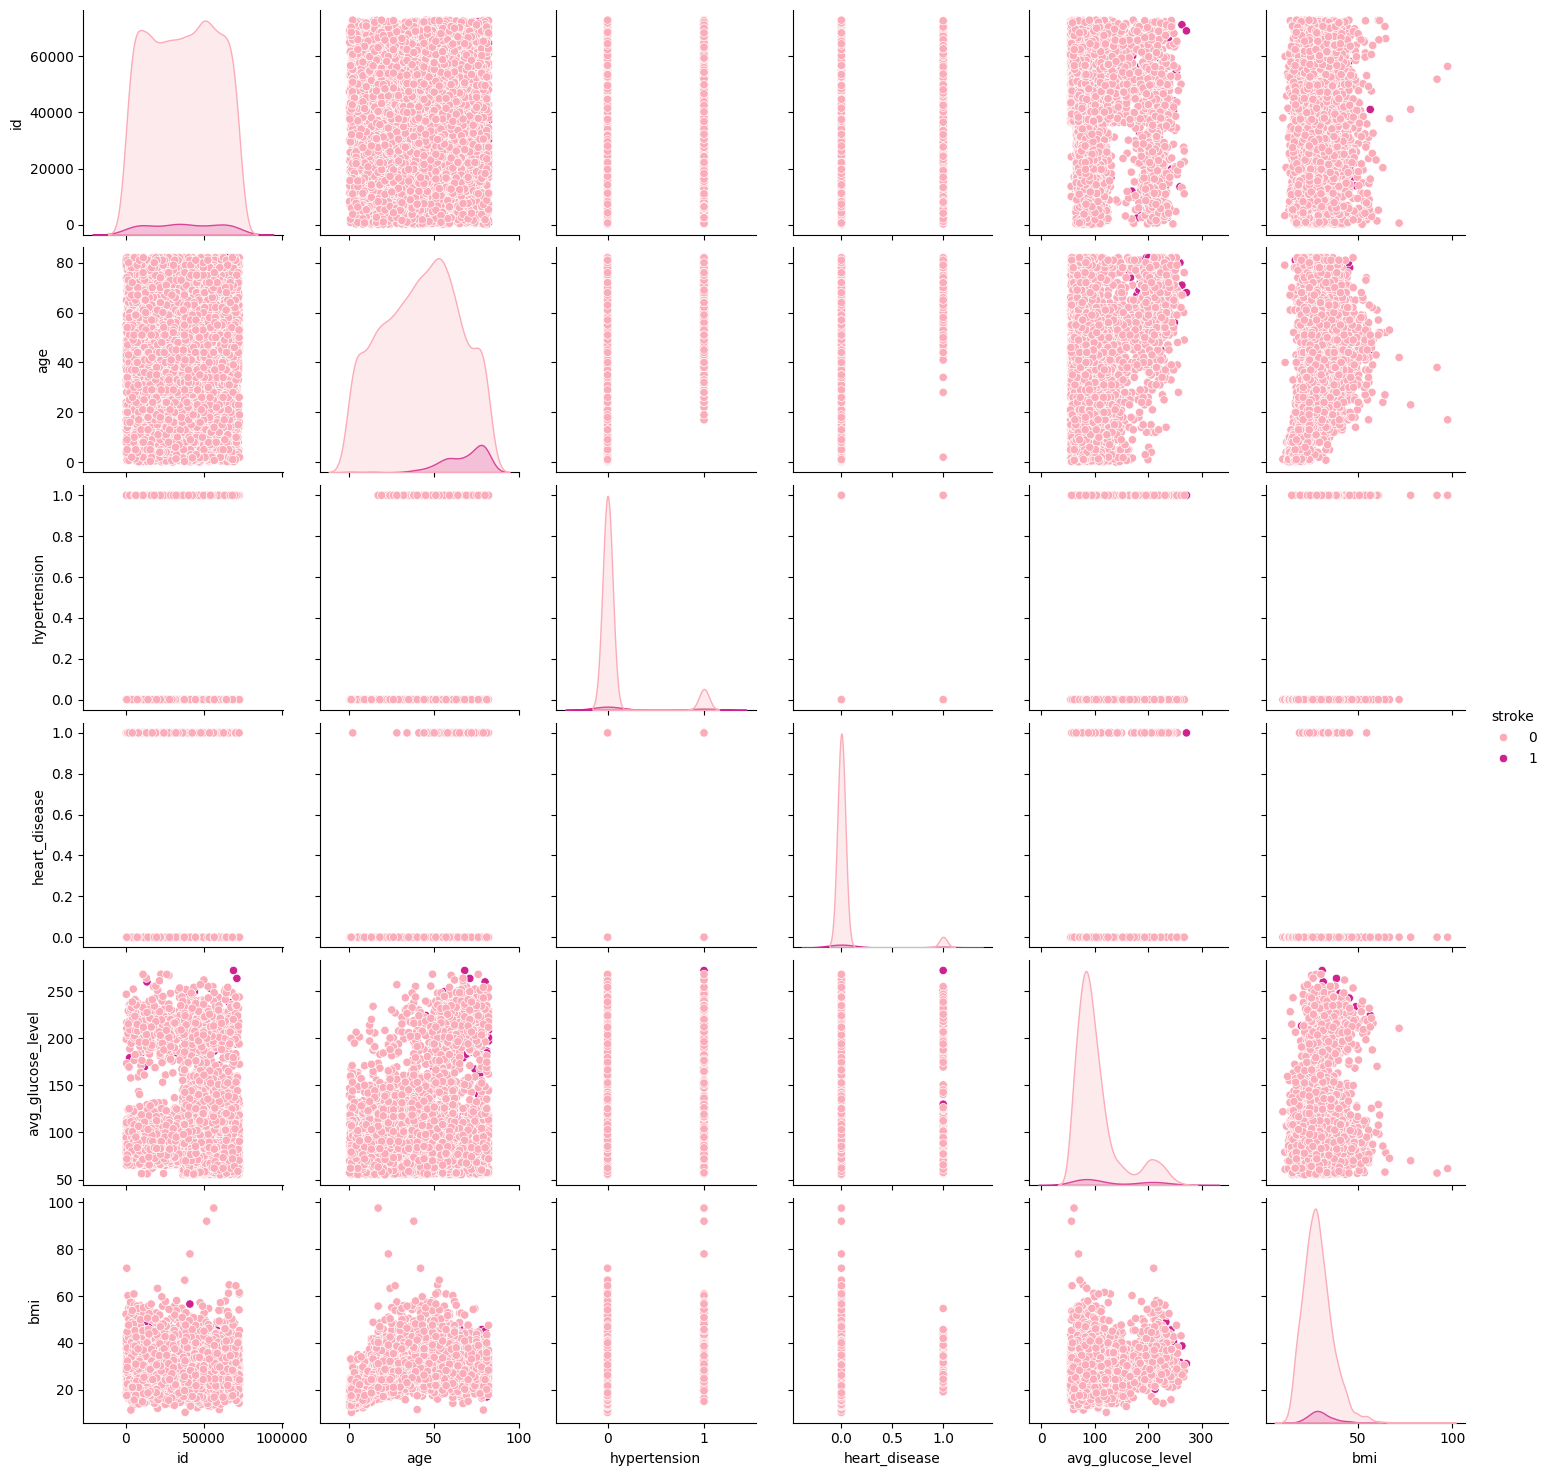

In [83]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='RdPu');

# Data Cleaning

In [84]:
import numpy as np
df.replace(["", " ", "NA", "N/A", "None", "-", "nan", "null", "NULL"], np.nan, inplace=True)

In [85]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [86]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [87]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [88]:
print(df.duplicated().sum())

0


In [89]:
df.drop('id', axis=1, inplace=True)

In [90]:
df['gender'] = df['gender'].replace('Other', 'Female')
count = df['gender'].value_counts()
print(count)

gender
Female    2995
Male      2115
Name: count, dtype: int64


Text(0.5, 1.0, 'age')

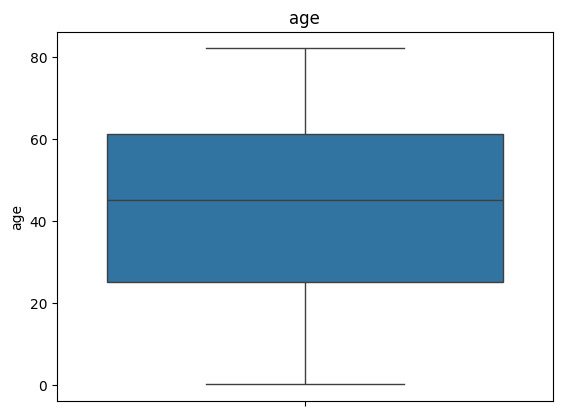

In [91]:
sns.boxplot(df['age'])
plt.title('age')

Text(0.5, 1.0, 'avg_glucose_level')

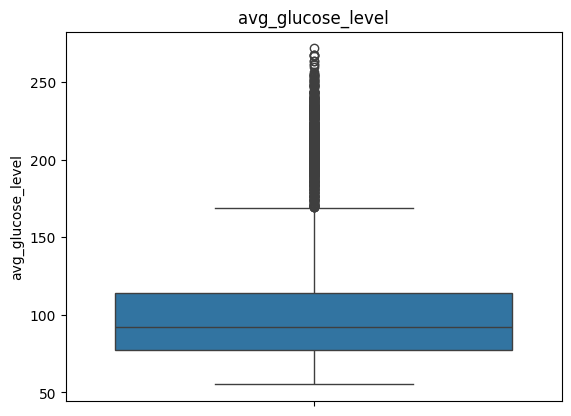

In [92]:
sns.boxplot(df['avg_glucose_level'])
plt.title('avg_glucose_level')

Text(0.5, 1.0, 'bmi')

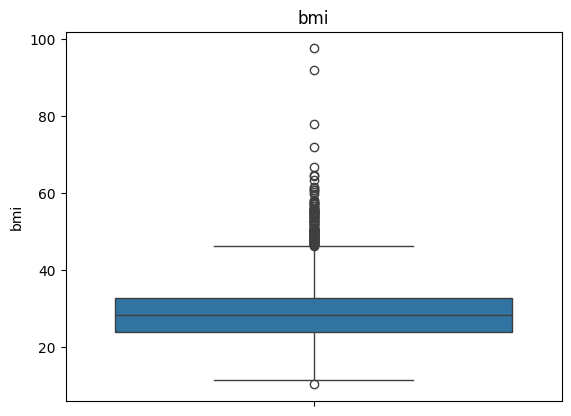

In [93]:
sns.boxplot(df['bmi'])
plt.title('bmi')

In [94]:
from scipy.stats import zscore

In [95]:
from scipy.stats import zscore
z_score_glucose = zscore(df['avg_glucose_level'])
z_score_bmi = zscore(df['bmi'])
glucose_outliers_count = np.sum(np.abs(z_score_glucose) > 3)
bmi_outliers_count = np.sum(np.abs(z_score_bmi) > 3)

print("all glucose :", glucose_outliers_count)
print("all bmi :", bmi_outliers_count)

all glucose : 49
all bmi : 59


In [96]:
zero_or_negative_values = {column: (df[column] <= 0).sum() for column in ['avg_glucose_level', 'bmi']}
zero_or_negative_values

{'avg_glucose_level': np.int64(0), 'bmi': np.int64(0)}

In [97]:
df['avg_glucose_level'] = np.where(np.abs(z_score_glucose) > 3, df['avg_glucose_level'].mean(), df['avg_glucose_level'])
df['bmi'] = np.where(np.abs(z_score_bmi) > 3, df['bmi'].mean(), df['bmi'])

In [98]:
from scipy.stats import zscore
z_score_glucose = zscore(df['avg_glucose_level'])
z_score_bmi = zscore(df['bmi'])
glucose_outliers_count = np.sum(np.abs(z_score_glucose) > 3)
bmi_outliers_count = np.sum(np.abs(z_score_bmi) > 3)

print("Remaining :", glucose_outliers_count)
print("Remaining :", bmi_outliers_count)

Remaining : 43
Remaining : 26


In [99]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [100]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
work_type,object
Residence_type,int64
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [101]:
df = pd.get_dummies(df, columns=['work_type', 'gender'])

In [102]:
df = pd.get_dummies(df, columns=['smoking_status'])

In [103]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,False,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,1,0,202.21,28.893237,1,False,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,False,True,False,False,True,False
3,49.0,0,0,1,1,171.23,34.400000,1,False,False,True,False,False,True,False,False,False,False,True
4,79.0,1,0,1,0,174.12,24.000000,1,False,False,False,True,False,True,False,False,False,True,False


In [104]:
new_columns = ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','gender_Female','gender_Male','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
df[new_columns] = df[new_columns].astype(int)

In [105]:
def classify_age(age):
    if age < 18:
        return '0' #Child
    elif age < 60:
        return '1' #youth
    else:
        return '2' #old
df['age_range'] = df['age'].apply(classify_age)
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_range
0,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,1,0,0,2
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,1,0,0,0,1,0,2
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0,1,0,2
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,1,0,0,0,0,1,1
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,1,0,0,0,1,0,2


In [106]:
df.drop('age', axis=1, inplace=True)

In [107]:
df.head()

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_range
0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,1,0,0,2
1,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,1,0,0,0,1,0,2
2,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0,1,0,2
3,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,1,0,0,0,0,1,1
4,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,1,0,0,0,1,0,2


In [108]:
df.to_csv('final cleaned stroke.csv', index=False)

# Analysis

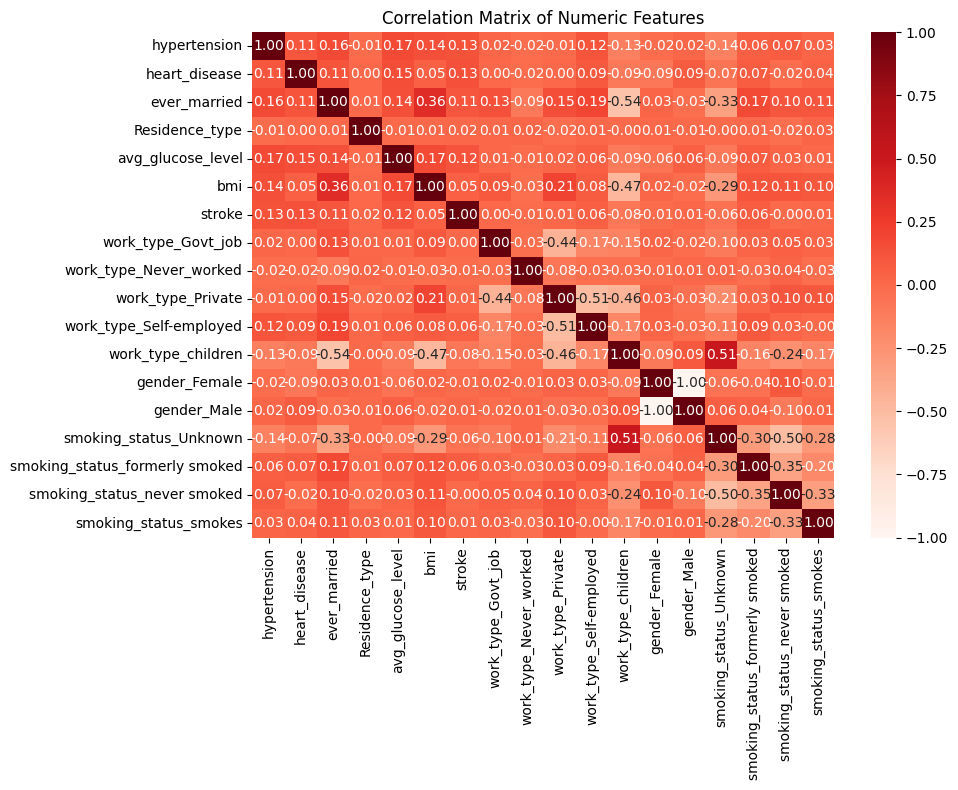

In [109]:
# 1- What is the correlation between numeric features?
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [110]:
#2-which Features is most strongly correlated with stroke?
correlation_matrix = df.corr(numeric_only=True)
stroke_corr = correlation_matrix['stroke'].drop('stroke')
stroke_corr_sorted = stroke_corr.sort_values(ascending=False)
print("Top features correlated with stroke:\n")
print(stroke_corr_sorted)

Top features correlated with stroke:

heart_disease                     0.134914
hypertension                      0.127904
avg_glucose_level                 0.118413
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.050479
Residence_type                    0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
smoking_status_never smoked      -0.004129
gender_Female                    -0.009117
work_type_Never_worked           -0.014882
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
Name: stroke, dtype: float64


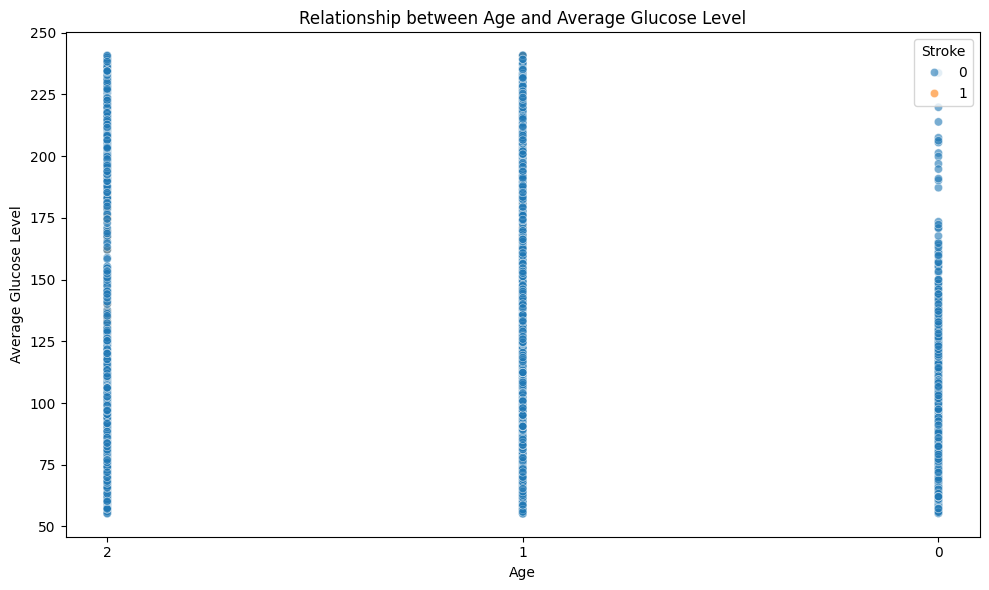

In [111]:
#3- What is the relationship between age and glucose level:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_range', y='avg_glucose_level', data=df, hue='stroke', alpha=0.6)
plt.title("Relationship between Age and Average Glucose Level")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

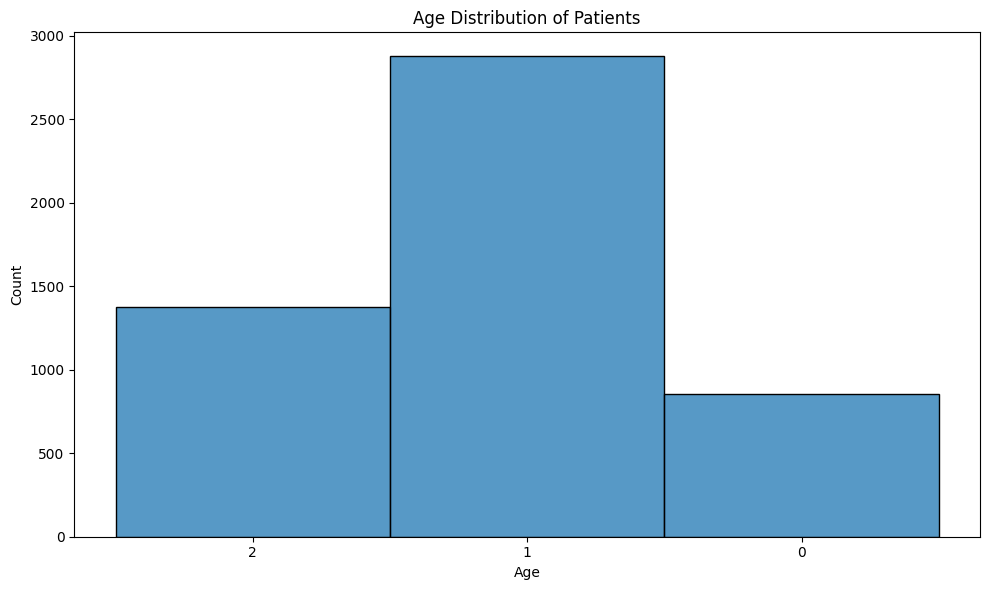

In [112]:
#4-Age distribution:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_range'], bins=30)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

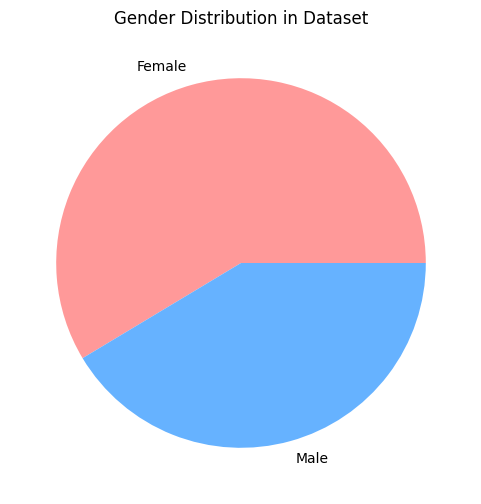

In [113]:
#5-Gender distribution:
gender_counts = {
    'Female': df['gender_Female'].sum(),
    'Male': df['gender_Male'].sum()
}
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values(), labels=gender_counts.keys(),colors=['#FF9999', '#66B2FF'])
plt.title("Gender Distribution in Dataset")
plt.show()

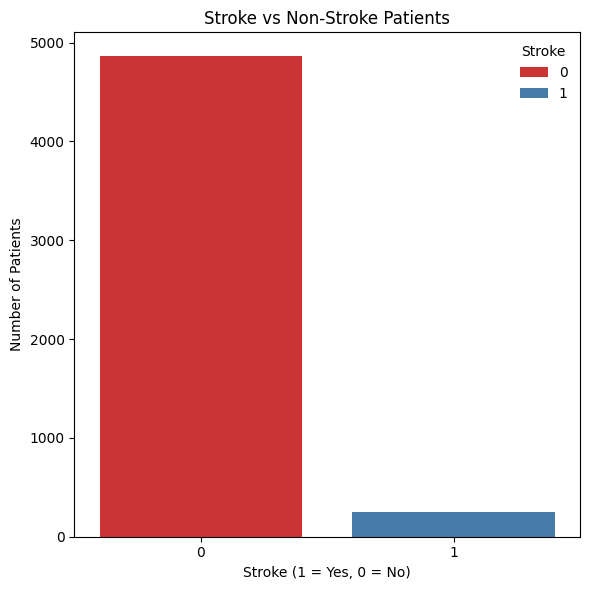

In [114]:
#6.How many patients had a stroke compared to those who didn’t?
stroke_counts = df['stroke'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, hue=stroke_counts.index, palette='Set1')
plt.title("Stroke vs Non-Stroke Patients")
plt.xlabel("Stroke (1 = Yes, 0 = No)")
plt.ylabel("Number of Patients")
plt.legend(title="Stroke", loc="upper right", frameon=False)  # لإخفاء مفتاح الرسم
plt.tight_layout()
plt.show()

In [115]:
#7-What is the average glucose level for stroke patients versus non-stroke patients?
mean_glucose_stroke = df[df['stroke'] == 1]['avg_glucose_level'].mean()
mean_glucose_non_stroke = df[df['stroke'] == 0]['avg_glucose_level'].mean()
print("Average glucose level for stroke patients: {mean_glucose_stroke}")
print("Average glucose level for non-stroke patients: {mean_glucose_non_stroke}")

Average glucose level for stroke patients: {mean_glucose_stroke}
Average glucose level for non-stroke patients: {mean_glucose_non_stroke}


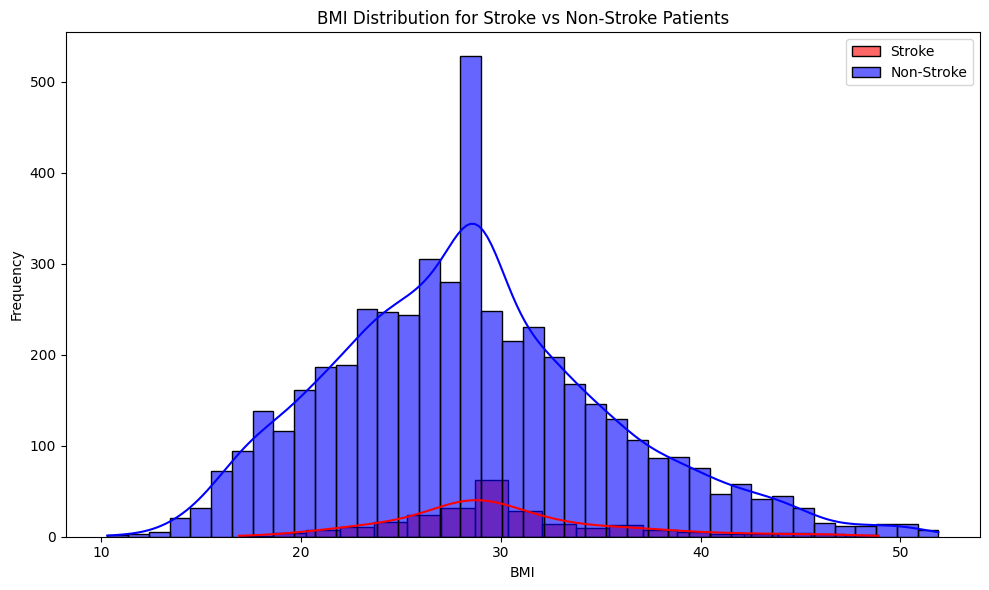

In [116]:
#8-How is BMI distributed between stroke and non-stroke patients?
plt.figure(figsize=(10, 6))
sns.histplot(df[df['stroke'] == 1]['bmi'], kde=True, color='red', label='Stroke', alpha=0.6)
sns.histplot(df[df['stroke'] == 0]['bmi'], kde=True, color='blue', label='Non-Stroke', alpha=0.6)
plt.title("BMI Distribution for Stroke vs Non-Stroke Patients")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

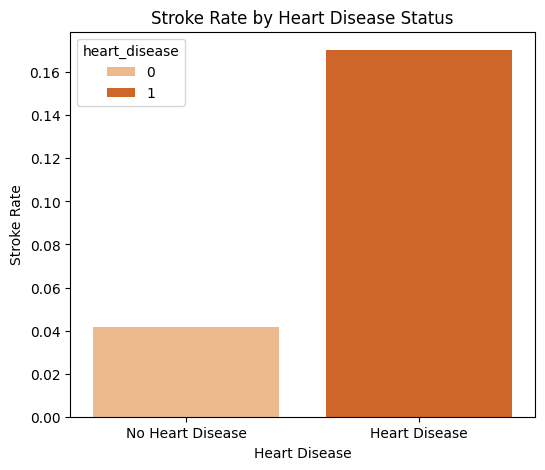

In [117]:
#10-Is heart disease a strong indicator of stroke risk?
grouped_heart = df.groupby('heart_disease')['stroke'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=grouped_heart, x='heart_disease', y='stroke', hue='heart_disease', palette='Oranges')
plt.title('Stroke Rate by Heart Disease Status')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.ylabel('Stroke Rate')
plt.xlabel('Heart Disease')
plt.show()

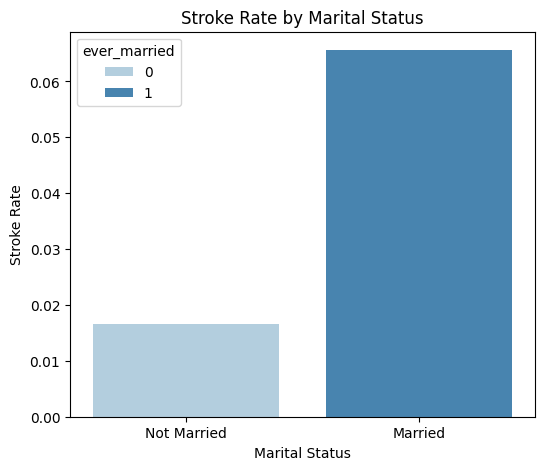

In [118]:
#11-Are married people more likely to have a stroke than unmarried people?
grouped_married = df.groupby('ever_married')['stroke'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=grouped_married, x='ever_married', y='stroke', hue='ever_married', palette='Blues')
plt.title('Stroke Rate by Marital Status')
plt.xticks([0, 1], ['Not Married', 'Married'])
plt.ylabel('Stroke Rate')
plt.xlabel('Marital Status')
plt.show()

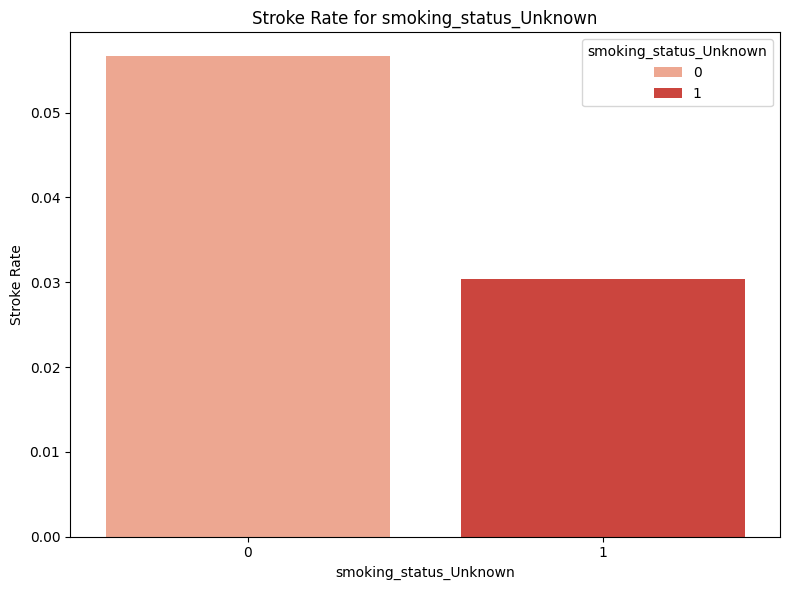

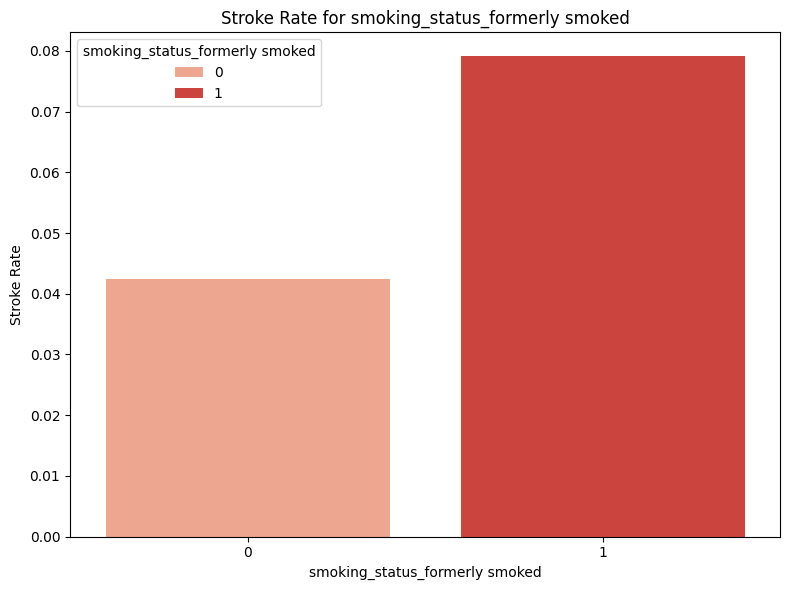

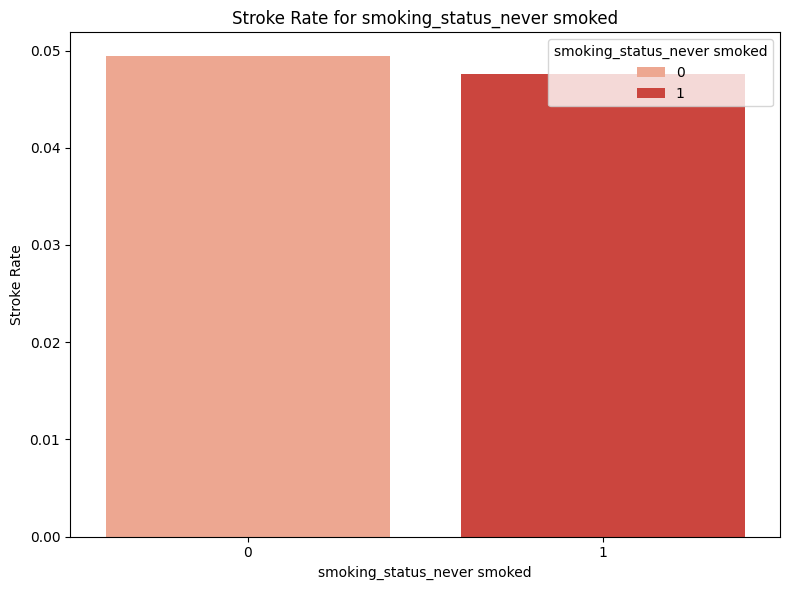

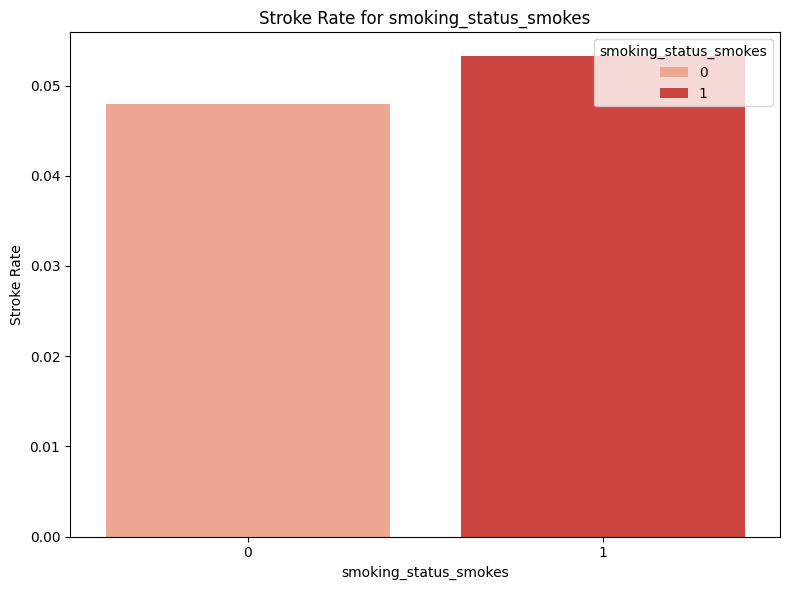

In [119]:
#13-What is the stroke rate among smokers versus non-smokers?
smoking_columns = [col for col in df.columns if col.startswith('smoking_status')]
for col in smoking_columns:
    grouped_smoking = df.groupby(col)['stroke'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='stroke', data=grouped_smoking, hue=col, palette='Reds')
    plt.title(f'Stroke Rate for {col}')
    plt.ylabel('Stroke Rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

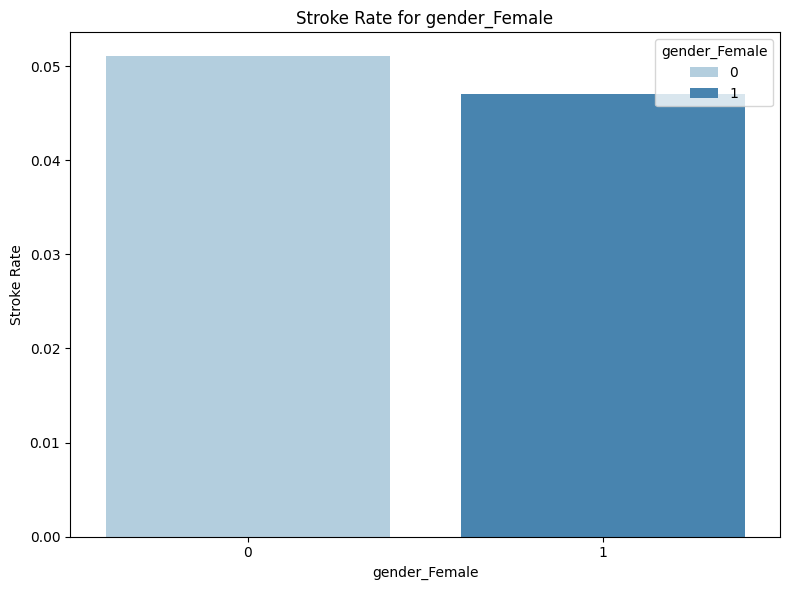

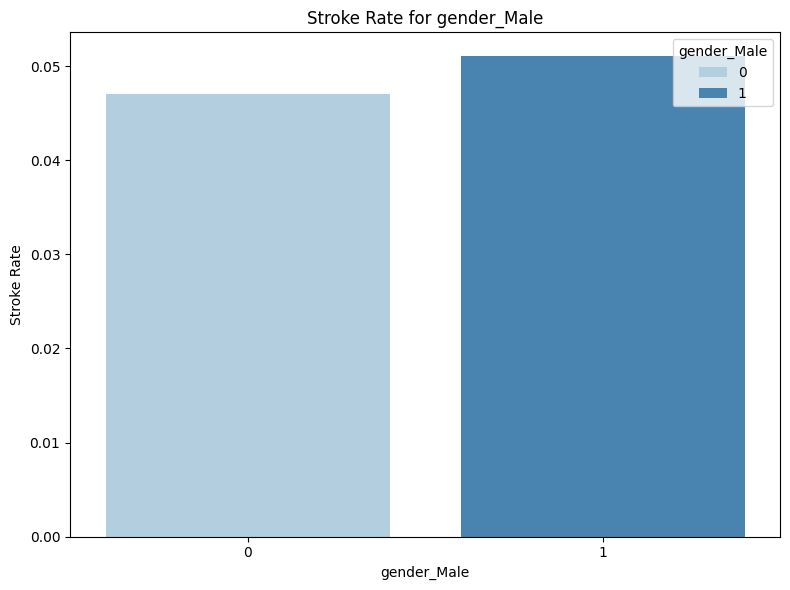

In [120]:
#14-Is there a difference in stroke rate between men and women?
gender_columns = [col for col in df.columns if 'gender' in col]
for col in gender_columns:
    grouped_gender = df.groupby(col)['stroke'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='stroke', data=grouped_gender, hue=col, palette='Blues')
    plt.title(f'Stroke Rate for {col}')
    plt.ylabel('Stroke Rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

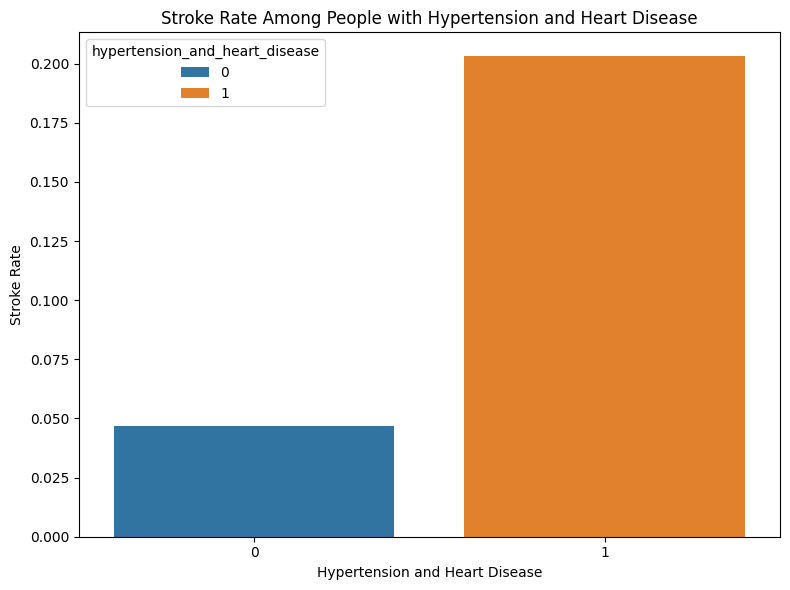

In [121]:
#15-What is the stroke rate among people who have both hypertension and heart disease?
df['hypertension_and_heart_disease'] = df['hypertension'] & df['heart_disease']
grouped_hypertension_heart = df.groupby('hypertension_and_heart_disease')['stroke'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='hypertension_and_heart_disease', y='stroke', data=grouped_hypertension_heart, hue='hypertension_and_heart_disease')
plt.title('Stroke Rate Among People with Hypertension and Heart Disease')
plt.ylabel('Stroke Rate')
plt.xlabel('Hypertension and Heart Disease')
plt.tight_layout()
plt.show()

#  RandomForest

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier


In [123]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [125]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [126]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[971   1]
 [ 50   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score: 0.9500978473581213


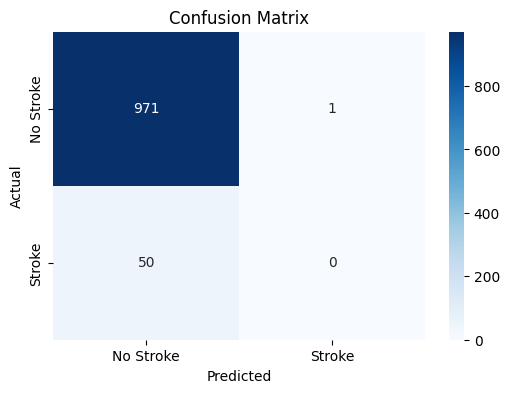

In [127]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [128]:
pred_df= pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df

,Actual Value,Predicted Value
3725,0,0
4481,0,0
1545,0,0
1820,0,0
1262,0,0
...,...,...
1042,0,0
1171,0,0
3199,0,0
3208,0,0


# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
X = df.drop('stroke', axis=1)
y = df['stroke']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [132]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[972   0]
 [ 50   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022

Accuracy Score: 0.9510763209393346


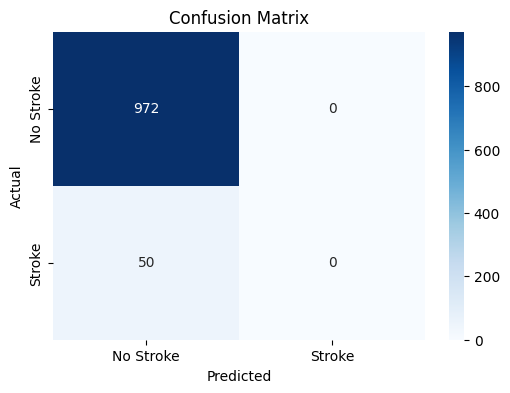

In [133]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#ACCURACY COMPARISION

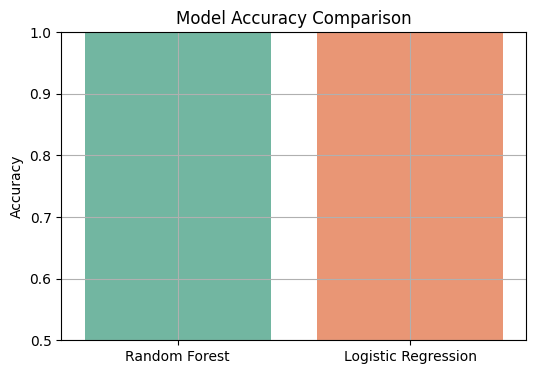

In [134]:
models = ["Random Forest", "Logistic Regression"]
accuracies = [95, 95]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylim(0.5, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(True)
plt.show()


# Insights from the Data:
Relationship between Features and Stroke:

From the analyses, it shows that :

1.factors like age, average glucose level (avg_glucose_level), and BMI are strong indicators of stroke risk.

2.Individuals with hypertension or heart disease are more likely to experience a stroke.

3.Those who smoke or have a history of smoking are at a higher risk of having a stroke.

4.Age significantly affect stroke risk, with older individuals being more prone to strokes.

5.Differences in stroke rates were observed between male and female populations.

6.Some groups, like married individuals, may show a higher experiencing a stroke compared to unmarried people.

7.People in more physically demanding jobs like government jobs or private jobs might have a higher stroke rate compared to those who are unemployed or work in other fields.

# Conclusion:
Through this analysis, I identified that **Logistic Regression With 95% Accuracy** is an effective model ,

The data shows a strong relationship between certain health conditions (like hypertension, heart disease, and smoking) and the likelihood of having a stroke. It also provides valuable insights into how age and gender affect stroke risk. Based on these insights, it is crucial to implement prevention and intervention strategies targeted at individuals most at risk according to these factors.